In [29]:
# Import Library

%matplotlib inline

import numpy as np
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
from keras import layers
from google.colab import drive
from keras.layers import SimpleRNN, Embedding, LSTM, Dense, Dropout, Activation, Flatten, Input, Conv2D, Conv1D, MaxPooling1D, MaxPooling2D, UpSampling2D, GlobalMaxPool1D, BatchNormalization, Lambda, Convolution1D, Convolution2D, ELU, concatenate
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping  


# 1.Autoencoder

A convolutional autoencoder is a particular flavor of autoencoder where we use convolutional layers instead of Dense layers. We have previously applied autoencoders to images using only Dense layers and the result worked fairly well. However, the local spatial correlations of images imply that we should Be able to do better using convolutional layers instead of Dense layers.

Build and fit a convolutional autoencoder for the CIFAR10 dataset.
The components of this network will be many of the same pieces we’ve used with convolutional classification networks: Conv2D, MaxPooling, and so on. The encoder part of the network should run the input image through a few convolutional layers of your choice. The decoder part of the network will uti- lize UpSampling2D to get the representation back to the original image size.

An example to guide your thinking can be found toward the bottom of this Post https://blog.keras.io/building-autoencoders-in-keras.html. DO NOT JUST COPY THIS CODE AND TURN IT IN. BE CREATIVE, COME UP WITH YOUR OWN VARIATION.

After training your network, visualize some examples of input images and their decoded reconstruction.

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# normalize data

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# divide x_test into validation and test
x_val = x_test[:7000]
x_test = x_test[7000:]

In [ ]:
input_img = Input(shape=(32, 32, 3))
x = Conv2D(64, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
decoded = Activation('sigmoid')(x)

model = Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
history = model.fit(x_train, x_train,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_val, x_val),
                    shuffle=True)

Epoch 1/100
1563/1563 [==============================] - 385s 246ms/step - loss: 0.5829 - val_loss: 0.5770
Epoch 2/100
1563/1563 [==============================] - 384s 246ms/step - loss: 0.5724 - val_loss: 0.5713
Epoch 3/100
1563/1563 [==============================] - 387s 247ms/step - loss: 0.5696 - val_loss: 0.5680
Epoch 4/100
1563/1563 [==============================] - 386s 247ms/step - loss: 0.5682 - val_loss: 0.5680
Epoch 5/100
1563/1563 [==============================] - 384s 245ms/step - loss: 0.5673 - val_loss: 0.5665
Epoch 6/100
1563/1563 [==============================] - 386s 247ms/step - loss: 0.5667 - val_loss: 0.5661
Epoch 7/100
1563/1563 [==============================] - 384s 246ms/step - loss: 0.5663 - val_loss: 0.5661
Epoch 8/100
1563/1563 [==============================] - 386s 247ms/step - loss: 0.5658 - val_loss: 0.5670
Epoch 9/100
1563/1563 [==============================] - 383s 245ms/step - loss: 0.5656 - val_loss: 0.5650
Epoch 10/100
1563/1563 [=============

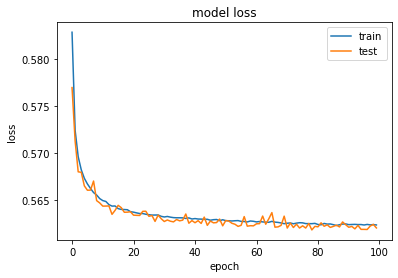

In [ ]:
def plot_train_history_loss(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

plot_train_history_loss(history)


In [ ]:
c10test = model.predict(x_test)
c10val = model.predict(x_val)

In [ ]:
# definition to show original image and reconstructed image
def showOrigDec(orig, dec, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(dec[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

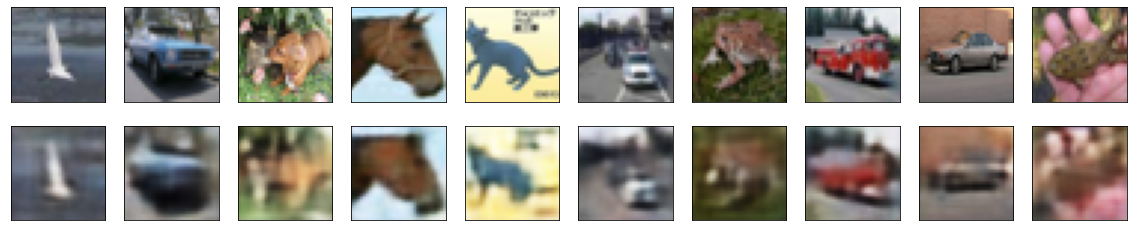

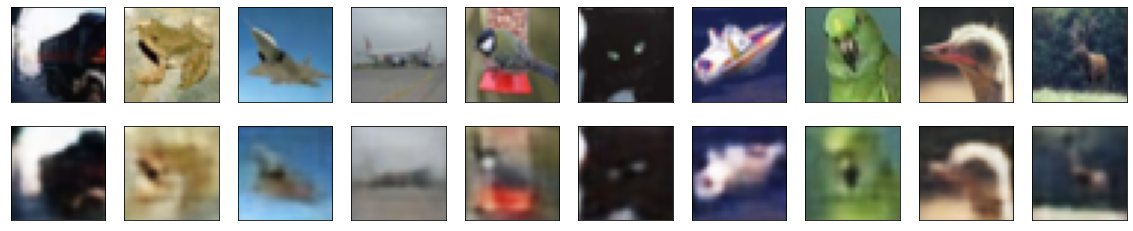

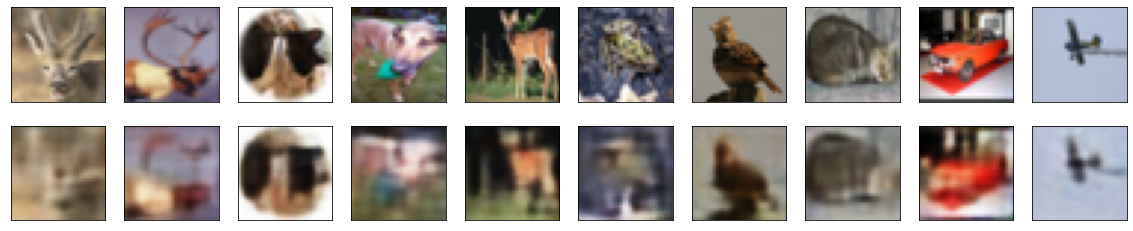

In [ ]:
showOrigDec(x_test, c10test)
showOrigDec(x_test[100:], c10test[100:])
showOrigDec(x_test[200:], c10test[200:])

# 2. Image Classification
We’ll continue to use the CIFAR10 dataset and build a deep convolutional
network for classification.

### 2.1 Deep CNN
Build a deep CNN to classify the images. Provide a brief description of the
architectural choices you’ve made: kernel sizes, strides, padding, network depth.Train your network end-to-end. Report on your model’s performance on the training set and test set.

In [ ]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# normalize data
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
deep_cnn_model = Sequential()

deep_cnn_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
deep_cnn_model.add(MaxPooling2D(pool_size=2))
deep_cnn_model.add(Dropout(0.3))
deep_cnn_model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
deep_cnn_model.add(MaxPooling2D(pool_size=2))
deep_cnn_model.add(Dropout(0.3))
deep_cnn_model.add(Flatten())
deep_cnn_model.add(Dense(256, activation='relu'))
deep_cnn_model.add(Dropout(0.5))
deep_cnn_model.add(Dense(10, activation='softmax'))

deep_cnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
deep_cnn_history = deep_cnn_model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/100
1563/1563 [==============================] - 90s 58ms/step - loss: 1.6500 - accuracy: 0.4060 - val_loss: 1.3976 - val_accuracy: 0.4814
Epoch 2/100
1563/1563 [==============================] - 88s 56ms/step - loss: 1.3303 - accuracy: 0.5267 - val_loss: 1.2459 - val_accuracy: 0.5648
Epoch 3/100
1563/1563 [==============================] - 89s 57ms/step - loss: 1.2357 - accuracy: 0.5667 - val_loss: 1.0896 - val_accuracy: 0.6311
Epoch 4/100
1563/1563 [==============================] - 88s 56ms/step - loss: 1.1977 - accuracy: 0.5821 - val_loss: 1.2263 - val_accuracy: 0.5799
Epoch 5/100
1563/1563 [==============================] - 92s 59ms/step - loss: 1.1855 - accuracy: 0.5858 - val_loss: 1.0110 - val_accuracy: 0.6552
Epoch 6/100
1563/1563 [==============================] - 88s 57ms/step - loss: 1.1827 - accuracy: 0.5940 - val_loss: 1.4634 - val_accuracy: 0.4903
Epoch 7/100
1563/1563 [==============================] - 88s 57ms/step - loss: 1.1837 - accuracy: 0.5952 - val_loss: 1

In [ ]:
score = deep_cnn_model.evaluate(x_test, y_test, verbose=1)
print("The test score: {acc}".format(acc = score))

313/313 [==============================] - 4s 14ms/step - loss: 1.5183 - accuracy: 0.4715
The test score: [1.5182955265045166, 0.4715000092983246]


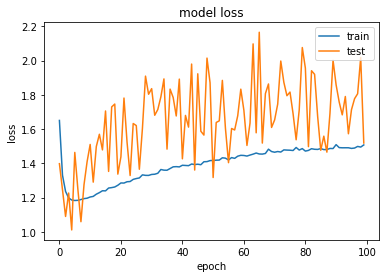

In [ ]:
plot_train_history_loss(deep_cnn_history)

### 2.2 Transfer Learning
Repeat the same task, but this time utilize a pre-trained network for the major-
ity of your model. You should only train the final Dense layer, all other weights should be fixed. You can use whichever pre-trained backbone you like (ResNet, VGG, etc). Report on your model’s performance on the training set and test set.

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)


base_model = VGG16(include_top=False, 
                   weights='imagenet',
                   pooling='avg'                
                   )

In [ ]:
last = base_model.get_layer('block3_pool').output

In [ ]:
# Add classification layers on top of it
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.6)(x)
pred = Dense(10, activation='softmax')(x)
transfer_learning_model = Model(base_model.input, pred)

for layer in base_model.layers:
     layer.trainable = False

transfer_learning_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
transfer_learning_history = transfer_learning_model.fit(x_train, y_train,
                            batch_size=32,                            
                            validation_data=(x_test, y_test),
                            epochs=20,
                            verbose=1)

Epoch 1/20
1563/1563 [==============================] - 401s 256ms/step - loss: 0.0718 - accuracy: 0.8546 - val_loss: 0.1386 - val_accuracy: 0.7651
Epoch 2/20
1563/1563 [==============================] - 403s 258ms/step - loss: 0.0710 - accuracy: 0.8563 - val_loss: 0.1371 - val_accuracy: 0.7667
Epoch 3/20
1563/1563 [==============================] - 403s 258ms/step - loss: 0.0712 - accuracy: 0.8554 - val_loss: 0.1420 - val_accuracy: 0.7637
Epoch 4/20
1563/1563 [==============================] - 401s 257ms/step - loss: 0.0703 - accuracy: 0.8570 - val_loss: 0.1415 - val_accuracy: 0.7665
Epoch 5/20
1563/1563 [==============================] - 403s 258ms/step - loss: 0.0700 - accuracy: 0.8572 - val_loss: 0.1401 - val_accuracy: 0.7619
Epoch 6/20
1563/1563 [==============================] - 404s 258ms/step - loss: 0.0696 - accuracy: 0.8576 - val_loss: 0.1413 - val_accuracy: 0.7617
Epoch 7/20
1563/1563 [==============================] - 402s 257ms/step - loss: 0.0684 - accuracy: 0.8605 - val_

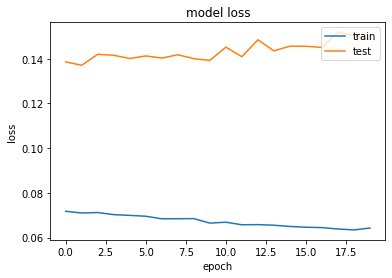

In [ ]:
plot_train_history_loss(transfer_learning_history)

#3. Text Classification

While images contain local spatial correlations and structure, many other datasets contain temporal correlations. Examples include time series and dis- crete sequences such as text. In this problem, we will tackle the task of text classification in the context of natural language.

**Background**. In this problem, we will build models that read text segments (messages) and identify whether they are **SPAM** or **HAM**.

Wikipedia describes **SPAM** as “the use of electronic messaging systems to send unsolicited bulk messages, especially advertising, indiscriminately.”
The term **‘HAM’** was originally coined by SpamBayes sometime around 2001 and is currently defined and understood to be “E-mail that is generally desired and isn’t considered SPAM.”

**Dataset**. The dataset consists of ∼ 5500 messages along with binary la- bels(SPAM or HAM) and is already preprocessed. So basically each sample is like **[MESSAGE, LABEL]**.

### 3.1 RNN
Build and train a Recurrent Neural Network to solve this text classification task. You can use any type of RNN you wish (SimpleRNN, GRU, LSTM).

In [2]:
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [59]:
# file_path = "/content/gdrive/My Drive/anly590-datasets/SPAM_detection.csv"

data = pd.read_csv("/content/gdrive/My Drive/anly590-datasets/SPAM_detection.csv")


In [60]:
texts = []
labels = []
for i, label in enumerate(data['category_val']):
    texts.append(data['Message'][i])
    if label == 0:
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)

In [68]:
# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500

# use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

data = pad_sequences(sequences, maxlen=maxlen)

np.random.seed(2115)

# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]


In [64]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model_rnn.fit(texts_train, y_train, epochs=100, batch_size=60, validation_split=0.2, callbacks=[early_stop])


Epoch 1/100
60/60 [==============================] - 8s 130ms/step - loss: 0.3794 - acc: 0.8460 - val_loss: 0.2999 - val_acc: 0.8733
Epoch 2/100
60/60 [==============================] - 7s 114ms/step - loss: 0.1312 - acc: 0.9638 - val_loss: 0.0809 - val_acc: 0.9765
Epoch 3/100
60/60 [==============================] - 7s 113ms/step - loss: 0.0579 - acc: 0.9849 - val_loss: 0.0520 - val_acc: 0.9854
Epoch 4/100
60/60 [==============================] - 7s 112ms/step - loss: 0.0349 - acc: 0.9907 - val_loss: 0.0511 - val_acc: 0.9877
Epoch 5/100
60/60 [==============================] - 7s 112ms/step - loss: 0.0238 - acc: 0.9927 - val_loss: 0.0397 - val_acc: 0.9888
Epoch 6/100
60/60 [==============================] - 7s 113ms/step - loss: 0.0184 - acc: 0.9938 - val_loss: 0.2925 - val_acc: 0.8834
Epoch 7/100
60/60 [==============================] - 7s 113ms/step - loss: 0.0329 - acc: 0.9907 - val_loss: 0.0854 - val_acc: 0.9720
Epoch 8/100
60/60 [==============================] - 7s 112ms/step - 

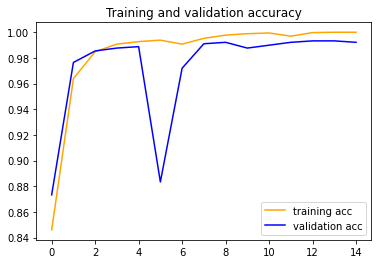

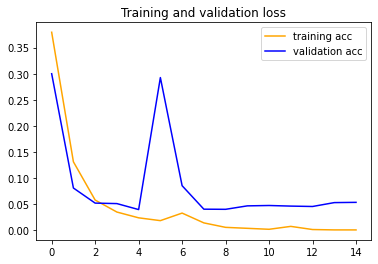

In [65]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [66]:
pred = model.predict_classes(texts_test)
acc = model.evaluate(texts_test, y_test)
proba_rnn = model.predict_proba(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

35/35 [==============================] - 1s 22ms/step - loss: 0.0735 - acc: 0.9740
Test loss is 0.07 accuracy is 0.97  
[[937  13]
 [ 16 149]]


### 3.2 CNN
Build and train a 1D CNN for this text classification task. We recommend you do a character-level convolution (with character embeddings). You might gain some insight and inspiration from these text classification approaches:
1.http://www.aclweb.org/anthology/D14-1181
2.https://arxiv.org/abs/1702.08568
Tips: after splitting every character in each training sample, the maximum length of training samples can be really big. If you choose to only do the padding trick to all the samples, it might raise OOM issues. So instead of padding only, you can also cut each sample at a certain point, which can make training more efficient and feasible while using CNN.

In [74]:
model_cnn = Sequential()
model_cnn.add(Dense(units=8270,activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(units=4000,activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(units=1000,activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(units=400,activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(units=1,activation='sigmoid'))
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_histroy = model_cnn.fit(
                  texts_train,
                  y_train,
                  epochs=100, batch_size=60,
                  validation_data=(texts_test, y_test), 
                  verbose=1,
                  callbacks=[early_stop]
)


Epoch 1/100
75/75 [==============================] - 36s 475ms/step - loss: 80.4202 - accuracy: 0.7602 - val_loss: 9.2755 - val_accuracy: 0.8601
Epoch 2/100
75/75 [==============================] - 35s 471ms/step - loss: 9.2092 - accuracy: 0.7783 - val_loss: 1.7098 - val_accuracy: 0.8574
Epoch 3/100
75/75 [==============================] - 35s 470ms/step - loss: 4.2076 - accuracy: 0.7734 - val_loss: 0.9875 - val_accuracy: 0.7973
Epoch 4/100
75/75 [==============================] - 38s 510ms/step - loss: 3.1672 - accuracy: 0.7792 - val_loss: 0.5999 - val_accuracy: 0.8296
Epoch 5/100
75/75 [==============================] - 35s 473ms/step - loss: 1.8806 - accuracy: 0.7797 - val_loss: 0.5448 - val_accuracy: 0.8601
Epoch 6/100
75/75 [==============================] - 35s 471ms/step - loss: 1.3223 - accuracy: 0.7934 - val_loss: 0.5675 - val_accuracy: 0.8592
Epoch 7/100
75/75 [==============================] - 35s 471ms/step - loss: 0.8737 - accuracy: 0.8149 - val_loss: 0.5707 - val_accuracy

In [75]:
loss, accuracy = model_cnn.evaluate(texts_test, y_test, verbose=1)
print('\nFinal Cross-Validation Accuracy', accuracy, '\n')


35/35 [==============================] - 3s 75ms/step - loss: 0.4049 - accuracy: 0.8601

Final Cross-Validation Accuracy 0.8600896596908569 



### 3.3
Be sure to directly compare your two methods with an ROC curve or similar validation method. Don’t forget to create a train-test split.

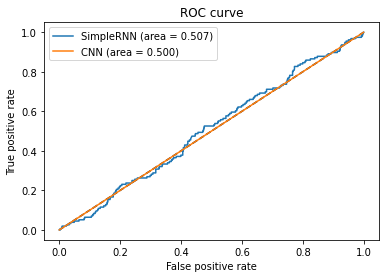

In [76]:
# SimpleRNN and CNN ROC Curve
y_pred_keras = model_rnn.predict(texts_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

cnn_y_pred_keras = model_cnn.predict(texts_test).ravel()
cnn_fpr_keras, cnn_tpr_keras, cnn_thresholds_keras = roc_curve(y_test, cnn_y_pred_keras)
cnn_auc_keras = auc(cnn_fpr_keras, cnn_tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='SimpleRNN (area = {:.3f})'.format(auc_keras))
plt.plot(cnn_fpr_keras, cnn_tpr_keras, label='CNN (area = {:.3f})'.format(cnn_auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


Both RNN and CNN models performed well if they are being trained for long time. RNN stopped early in 15 epoches and CNN stopped in 55. RNN trained faster than CNN.